# Nested Donut Chart

Generates a nested donut chart with 2 layers and applies data labels. Requires the following format of data:

| Category | Sub-category | Data Value |
| -------- | ------------ | ---------- |
| Category 1 | Sub-Cat 1 | Data Value |
| Category 1 | Sub-Cat 2 | Data Value |
| Category 1 | Sub-Cat 3 | Data Value |
| Category 2 | Sub-Cat 1 | Data Value |
| Category 2 | Sub-Cat 2 | Data Value |
| Category 3 | Sub-Cat 1 | Data Value |
| Category 3 | Sub-Cat 2 | Data Value |
| Category 3 | Sub-Cat 3 | Data Value |
| Category 3 | Sub-Cat 4 | Data Value |

The inner layer will be split by Category and the outer layer will be split by Sub-category. Wedges are labelled by their category name and data value. Inner wedges align with their outer wedges and colour palettes help to link categories together visually.

## Import libraries

For this function we will need Pandas, NumPy and MatPlotLib.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Get data

The below shows an example DataFrame constructed from scratch. You could replicate this using `GroupBy` to aggregate data from a larger set.

#### Outer wedges

In [5]:
subcats = pd.DataFrame([['Fruit', 'Tropical', 236],
                     ['Fruit', 'Soft Fruit', 502],
                     ['Fruit', 'Apples', 178],
                     ['Salads', 'Bagged Salads', 467],
                     ['Salads', 'Cucumbers', 105],
                     ['Vegetables', 'Potatoes', 783],
                     ['Vegetables', 'Brassicas', 370],
                     ['Vegetables', 'Prep Veg', 79],
                     ['Vegetables', 'Root Veg', 253]],
                     columns=['Category', 'Sub-category', 'Sales'])
subcats

,Category,Sub-category,Sales
0,Fruit,Tropical,236
1,Fruit,Soft Fruit,502
2,Fruit,Apples,178
3,Salads,Bagged Salads,467
4,Salads,Cucumbers,105
5,Vegetables,Potatoes,783
6,Vegetables,Brassicas,370
7,Vegetables,Prep Veg,79
8,Vegetables,Root Veg,253


#### Inner wedges

In [7]:
cats = pd.DataFrame([['Fruit', 916],
                     ['Salads', 572],
                     ['Vegetables', 1485]],
                     columns=['Category', 'Sales'])
cats

,Category,Sales
0,Fruit,916
1,Salads,572
2,Vegetables,1485


## Generate colour arrays

We need an array of values between 0 and 255 to feed a colour map. These will be equally divided across the items in the data. NumPy is used below to create evenly spaced numbers and will adapt if more/less items appear in the data.

#### Inner colour array

In [9]:
# np.arange creates an array of evenly spaced numbers within a given size
inner_array = np.arange(cats['Category'].size)*(255/cats['Category'].size)
# colour map needs integer values
inner_array = inner_array.astype(int)
inner_array

array([  0,  85, 170])

#### Outer colour array

This is more complicated as outer wedges' colours need to be linked tonally to their respective inner wedge. As above, this adapts to the number of items in the data and evenly spreads colours.

A step is created between categories to provide a 'jump' in the colour spectrum to help differentiate categories.

In [11]:
# blank array
outer_array1 = []

# count number of sub-categories for each category
num_cats = []
for x in subcats['Category'].unique():
    num_cats.append(subcats[subcats['Category']==x]['Sub-category'].size)

cntr = 0

# 'jump' between categories
# gap = usable digits on spectrum (last 40% blocked to create step)
gap = 255/cats['Category'].size
gap*=0.6

# loop through unique categories in subcats
for x in subcats['Category'].unique():
    subs = 1
    # loop through sub-categories for current category
    for y in subcats[subcats['Category']==x]['Sub-category']:
        # base colour (from inner wedge) + gap divided by current category position * current sub-cat position
        curr_col = int(inner_array[cntr] + ((gap/num_cats[cntr]) * subs))
        outer_array1.append(curr_col)
        subs+=1
    cntr+=1

outer_array = np.array(outer_array1)
outer_array

array([ 17,  34,  51, 110, 136, 182, 195, 208, 221])

## Show the chart

We use `cmap` to create colour maps from the array we just generated. These can be passed to the `colors` parameter of the plots.

The nested donut is actually two separate pie plots on the same figure, with different radii.

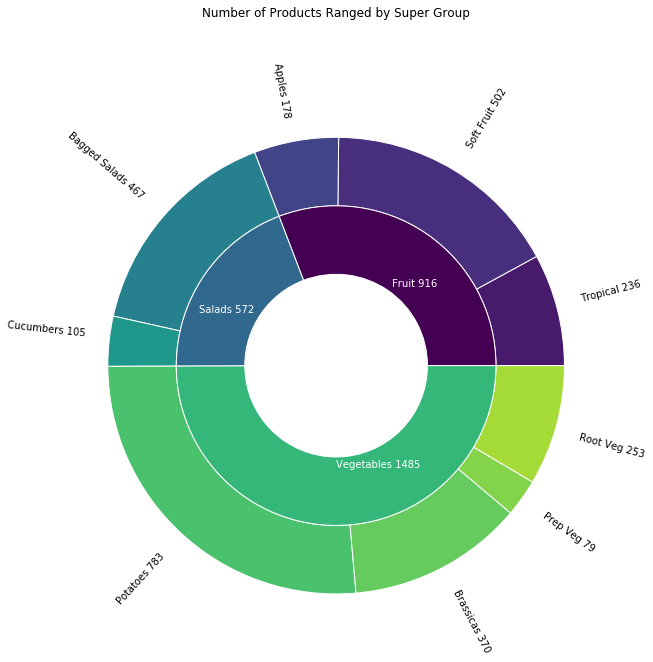

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
size = 0.3

# colour map
cmap = plt.get_cmap('viridis') # try our these too: 'plasma', 'summer', 'spring', 'twilight', 'hsv'
inner_colors = cmap(inner_array)
outer_colors = cmap(outer_array)

# set up lists of labels
labels_outer = subcats['Sub-category'] + ' ' + subcats.sum(axis=1).astype(str)
labels_inner = cats['Category'] + ' ' + cats['Sales'].astype(str)

ax.pie(subcats.sum(axis=1), radius=1, colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w'),
       labels=labels_outer, rotatelabels=True)
ax.pie(cats.sum(axis=1), radius=1-size, colors=inner_colors, wedgeprops=dict(width=size, edgecolor='w'), 
       labels=labels_inner, labeldistance=0.62, textprops=dict(color="w"))

ax.set(aspect="equal", title='Sales by Category')
ax.title.set_position([0.5, 1.10])

plt.show()